In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm


/Users/owner/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
df_total = pd.read_csv('zillow-carlifornia .csv', parse_dates=True, squeeze=True)

In [4]:
df = df_total.iloc[:-20,]
df_test = df_total.iloc[-20:,]

In [5]:
df.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


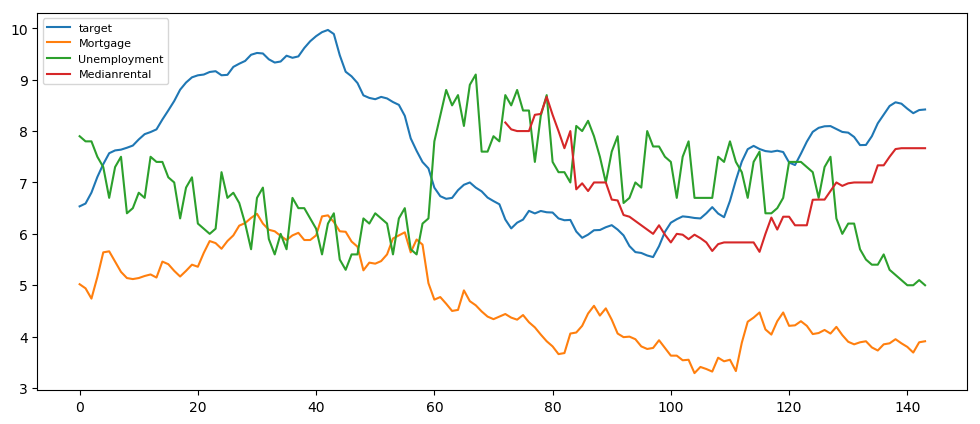

In [6]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['MedianSoldPrice_AllHomes.California']/50000, label='target')
plt.plot(df['MedianMortageRate'], label='Mortgage')
plt.plot(df['UnemploymentRate'], label='Unemployment')
plt.plot(df['MedianRentalPrice_AllHomes.California']/300, label='Medianrental')
plt.legend(loc='upper left', fontsize=8)

plt.show()

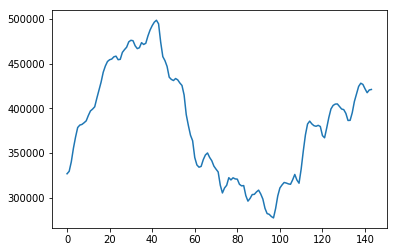

In [7]:
pyplot.plot(df['MedianSoldPrice_AllHomes.California'])
pyplot.show()

In [8]:
# X = df[['MedianMortageRate','MedianMortageRate']]
# train_size = int(X.shape[0] * 0.8)
# X_train = X[:train_size,]
# X_test = X[train_size:,]

In [9]:
series = df['MedianSoldPrice_AllHomes.California']

In [10]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.768391
p-value                          0.062933
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


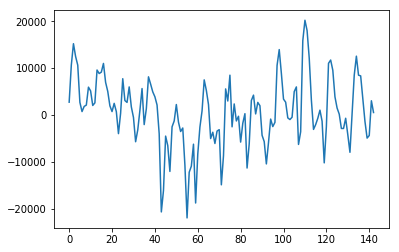

In [11]:
X=series
d1 = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 d1.append(value)

plt.plot(d1) 
pyplot.show()

In [12]:
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


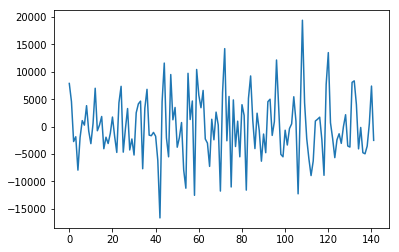

In [13]:
X=d1
d2 = list()
for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 d2.append(value)

plt.plot(d2) 
pyplot.show()

In [14]:
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


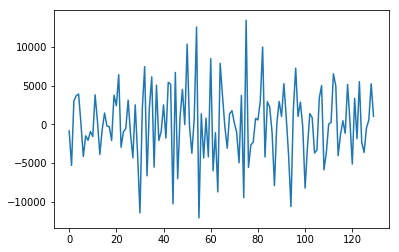

In [15]:
m = 12
X=d2
d3 = list()
for i in range(12, len(X)):
 value = X[i] - X[i - m]
 d3.append(value)

plt.plot(d3) 
pyplot.show()

In [16]:
adf_test(d3)

Results of Dickey-Fuller Test:
Test Statistic                  -5.149454
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


# SARIMA

In [39]:
X = series
train_size = int(len(X) * 0.8)
train = X[:train_size,]
valid = X[train_size:,]

In [53]:
#if we select model based on train directly
model2 = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1807.812, BIC=1820.311, Fit time=1.558 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=1887.649, BIC=1892.649, Fit time=0.027 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=1896.124, BIC=1906.124, Fit time=0.372 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1841.415, BIC=1851.414, Fit time=0.377 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=1825.971, BIC=1840.970, Fit time=0.935 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=1894.700, BIC=1904.699, Fit time=0.274 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 2, 12); AIC=1826.015, BIC=1841.013, Fit time=1.485 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=1825.582, BIC=1843.080, Fit time=3.660 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1809.078, BIC=1824.077, Fit time=1.792 seconds
Fit ARIMA: order=(1, 1, 0) s

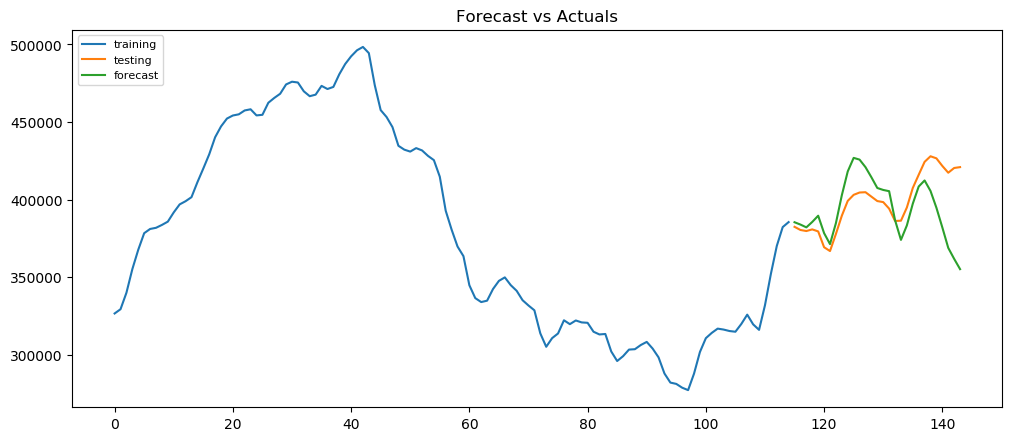

In [54]:
fitted2 = model2.fit(train)
fc2, conf2 = fitted2.predict(len(valid),return_conf_int=True,alpha=0.05)
fc_series2 = pd.Series(fc2, index=valid.index)
lower_series = pd.Series(conf2[:, 0], index=valid.index)
upper_series = pd.Series(conf2[:, 1], index=valid.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='testing')
plt.plot(fc_series2, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
mse2 = ((fc_series2 - valid) ** 2).mean()
rmse2=round(np.sqrt(mse2), 2)
print(rmse2)

23694.48


In [56]:
# d=2,D=1, 230219.71
# d=2 D=2, 169021.03
# d=1 D=2, 23694.48
# SARIMAX, 87071.98

# ETS

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(len(valid))
fit2 = model2.fit()
pred2 = fit2.forecast(len(valid))

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


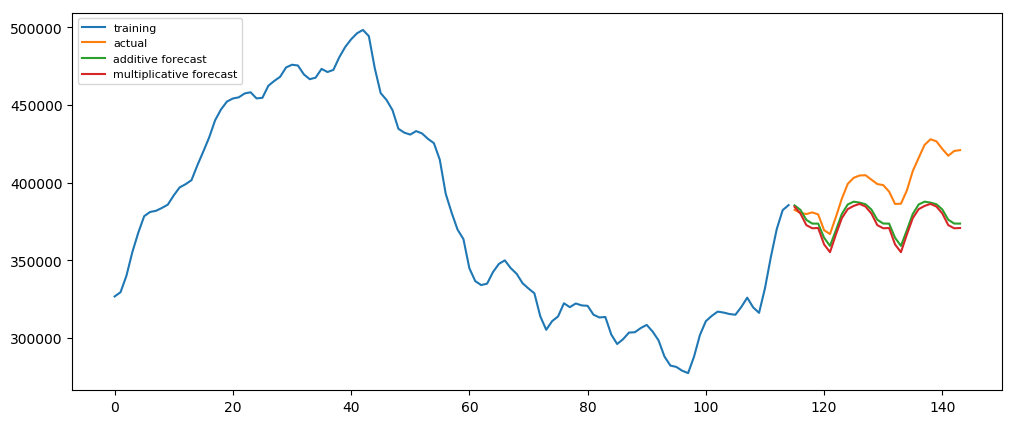

In [58]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [60]:
rmse1 = np.sqrt(np.mean(np.square(valid.values- pred.values)))
rmse2 = np.sqrt(np.mean(np.square(valid.values- pred2.values)))
print(rmse1)
print(rmse2)

25716.921247319475
28034.618507833904


# MULTI-VARIATE

In [144]:
X = df[['MedianMortageRate','UnemploymentRate']]
train_size = int(X.shape[0] * 0.8)
X_train = X.iloc[:train_size,]
X_valid = X.iloc[train_size:,]

In [145]:
modelx = SARIMAX(train, order=(1,1,1),seasonal_order=(0, 2, 1, 12),exog=X_train)
fitx=modelx.fit()
print(fitx.summary())

                                    Statespace Model Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes.California   No. Observations:                  115
Model:                  SARIMAX(1, 1, 1)x(0, 2, 1, 12)   Log Likelihood                -894.942
Date:                                 Sat, 30 Nov 2019   AIC                           1801.884
Time:                                         16:56:29   BIC                           1816.883
Sample:                                              0   HQIC                          1807.932
                                                 - 115                                         
Covariance Type:                                   opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MedianMortageRate  2147.9547   2250.691      0.954      0.34

/Users/owner/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [146]:
fc = fitx.predict(start=115, end=143, exog=X_valid)

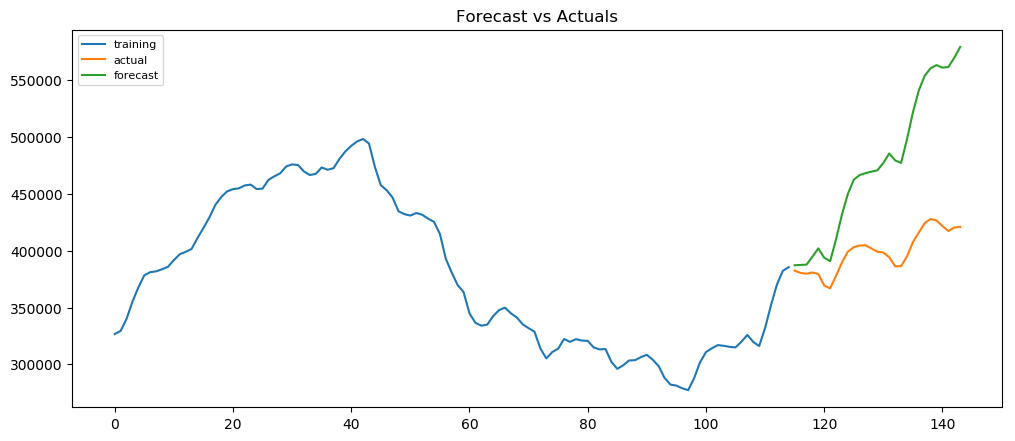

In [147]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [148]:
mse = ((fc_series - valid) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

91003.7


# VAR

In [149]:
#VAR
series=df[['MedianMortageRate','UnemploymentRate','MedianSoldPrice_AllHomes.California']]
train = series[:int(0.80*(len(series)))]
test = series[int(0.80*(len(series))):]
train.head()

,MedianMortageRate,UnemploymentRate,MedianSoldPrice_AllHomes.California
0,5.02,7.9,326752.55
1,4.94,7.8,329501.50
2,4.74,7.8,340125.45
3,5.16,7.5,355329.50
4,5.64,7.3,367818.15


In [150]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(2)
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Nov, 2019
Time:                     16:56:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.0399
Nobs:                     113.000    HQIC:                   12.7388
Log likelihood:          -1168.14    FPE:                    277494.
AIC:                      12.5331    Det(Omega_mle):         231710.
--------------------------------------------------------------------
Results for equation MedianMortageRate
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                         -0.381441         0.329311           -1.158           0.247
L1.MedianMortageRate                           1.00987

In [158]:
fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = series.columns
pred = pd.DataFrame(index=test.index,columns=[cols])
for j in range(0,3):
    for i in range(0, len(fc)):
       pred.iloc[i][j] = fc[i][j]

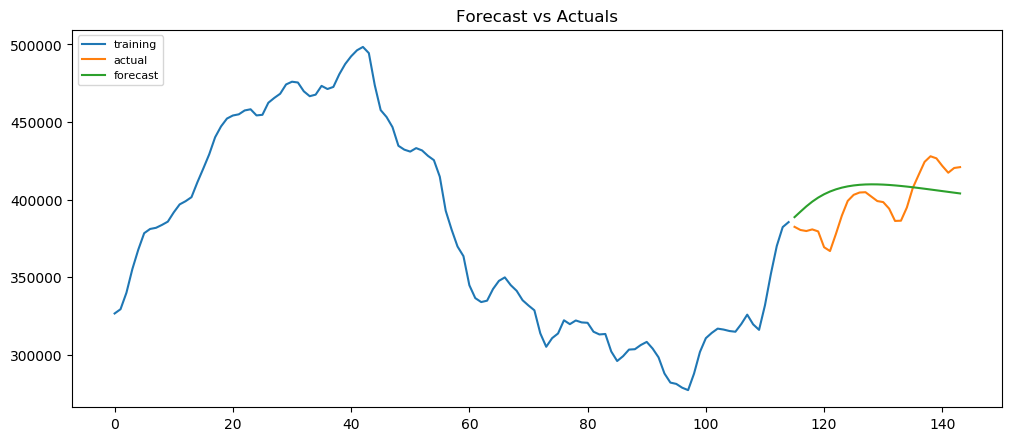

In [159]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['MedianSoldPrice_AllHomes.California'], label='training')
plt.plot(test['MedianSoldPrice_AllHomes.California'], label='actual')
plt.plot(pred['MedianSoldPrice_AllHomes.California'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()